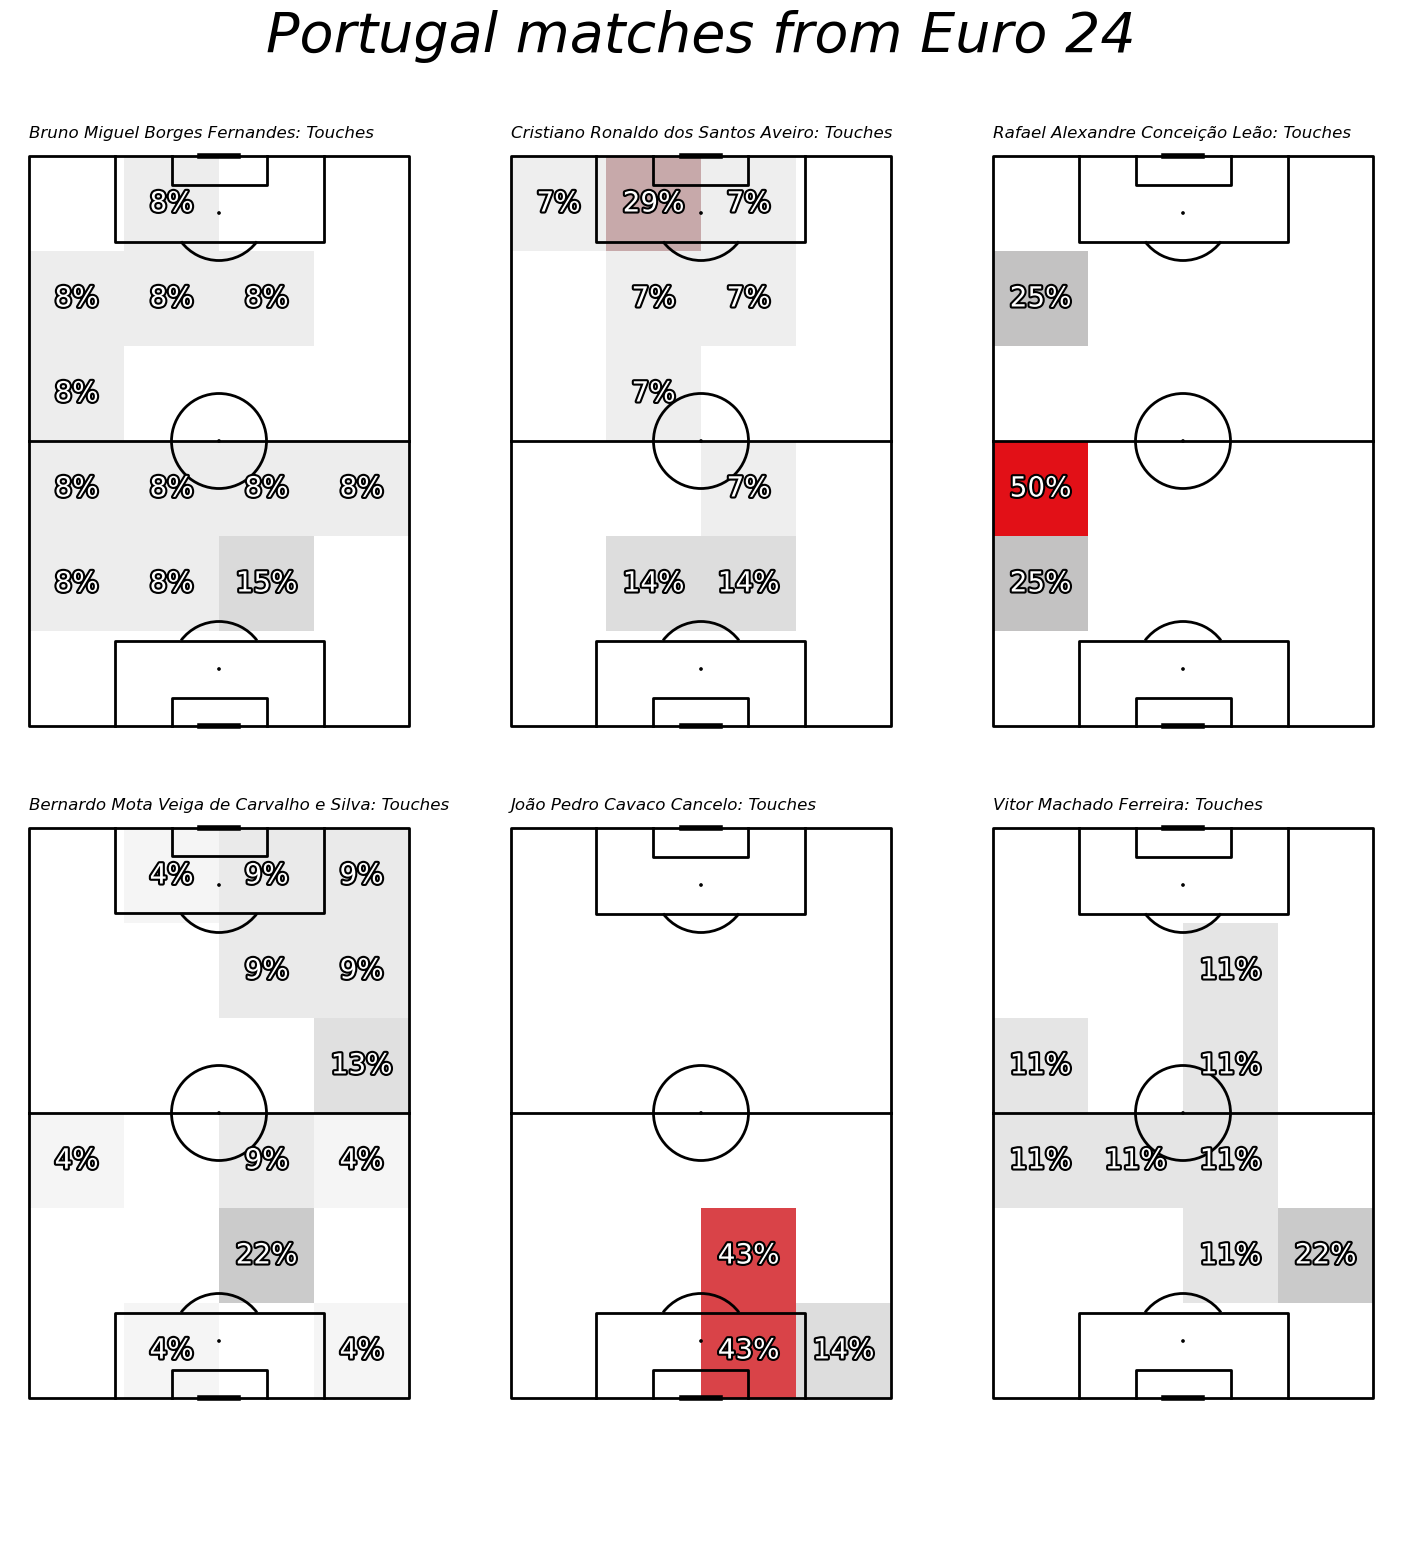

In [15]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch
import seaborn as sns

from statsbombpy import sb
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects

# Obter competições disponíveis
free_comps = sb.competitions()
free_comps

# Obter jogos do Euro 2024
euro_2024 = sb.matches(competition_id=55, season_id=282).sort_values(by='match_date')
euro_2024.head()

# Definir o time de interesse
team = "Portugal"

# Filtrar jogos do time de interesse
matches_df = euro_2024[(euro_2024['home_team'] == team) | (euro_2024['away_team'] == team)]
matches_df = matches_df.sort_values(by='match_date', ascending=False)

# Obter o ID do último jogo
latest_match_id = matches_df.match_id.iloc[0]

# Obter eventos do jogo mais recente
events_df = sb.events(match_id=latest_match_id)


############ALTERAR PARA OBTER OS DADOS GERAIS###########################
# statsbomb_data = pd.DataFrame()

# for match_id in latest_match_id:
#     events = sb.events(match_id=match_id)
#     statsbomb_data = pd.concat([statsbomb_data, events], ignore_index=True)

# # Exibir as primeiras 5 linhas dos dados de eventos
# print(statsbomb_data.head(5))

# # Opcional: Função de limpeza (se necessário)
# def allclean(df):
#     # Adicione aqui a lógica de limpeza conforme necessário
#     # Exemplo: Remover colunas não desejadas
#     return df

# statsbomb_data = allclean(statsbomb_data)


# # Exibir as primeiras 5 linhas dos dados de eventos limpos
# #print(statsbomb_data.head(5))


# events_df =statsbomb_data
####################################################################################



# Dividir coordenadas em colunas separadas
events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)
events_df[['carry_end_x', 'carry_end_y']] = events_df['carry_end_location'].apply(pd.Series)

# Definir jogadores de interesse
players = [
    "Bruno Miguel Borges Fernandes",
    "Cristiano Ronaldo dos Santos Aveiro",
    'Rafael Alexandre Conceição Leão',
    'Bernardo Mota Veiga de Carvalho e Silva',
    'João Pedro Cavaco Cancelo',
    "Vitor Machado Ferreira"
]

# touches = ['Pass', 'Ball Receipt*', 'Carry', 'Clearance', 'Foul Won', 'Block',
#            'Ball Recovery', 'Duel', 'Dribble', 'Interception', 'Miscontrol', 'Shot']

#flip values to other metrics but use the same variable 'touches' 
#touches = ['Pressure', 'Tackle', 'Foul Committed', 'Interception', 'Block']
##############



# Obter toques dos jogadores
players_df = [events_df[(events_df.player == player) & (events_df.type.isin(touches))] for player in players]

# Criar mapa de cores
colour1 = "white"
colour2 = "#c3c3c3"
colour3 = "#e21017"
cmaplist = [colour1, colour2, colour3]
cmap = LinearSegmentedColormap.from_list("", cmaplist)

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()]

# Definir estilo do campo
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, line_color='#000000', linewidth=2, half=False)

# Criar uma grade de campos
fig, axs = pitch.grid(nrows=2, ncols=3, figheight=16, grid_width=0.65,
                      endnote_height=0.03, endnote_space=0.05, axis=False,
                      title_space=0.02, title_height=0.06, grid_height=0.8)

# Obter dados para heatmap e calcular vmax
bin_statistics = [pitch.bin_statistic(player_df.x, player_df.y, statistic='count', bins=(6, 4), normalize=True) for player_df in players_df]
vmax = max(stat['statistic'].max() for stat in bin_statistics)
vmin = 0

# Plotar heatmaps
for i, (player, bin_stat, ax) in enumerate(zip(players, bin_statistics, axs['pitch'].ravel())):
    pitch.heatmap(bin_stat, ax=ax, cmap=cmap, vmax=vmax, vmin=vmin)
    pitch.label_heatmap(bin_stat, color='white', path_effects=path_eff, fontsize=20, ax=ax,
                        str_format='{:.0%}', ha='center', va='center', exclude_zeros=True)
    ax_text(0, 125, f'{player}: Touches', ha='left', c='black', va='center', fontsize=12, ax=ax, style='italic')

fig.suptitle('Portugal matches from Euro 24', fontsize=40, style='italic')
plt.show()


In [3]:
matches_df

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
4,3942349,2024-07-05,22:00:00.000,Europe - UEFA Euro,2024,Portugal,France,0,0,available,...,2024-07-12T02:00:16.871522,5,Quarter-finals,Volksparkstadion,Michael Oliver,Roberto Martínez Montoliú,Didier Deschamps,1.1.0,2,2
13,3941020,2024-07-01,22:00:00.000,Europe - UEFA Euro,2024,Portugal,Slovenia,0,0,available,...,2024-07-13T19:48:57.256302,4,Round of 16,Deutsche Bank Park,Daniele Orsato,Roberto Martínez Montoliú,Matjaž Kek,1.1.0,2,2
34,3938644,2024-06-26,22:00:00.000,Europe - UEFA Euro,2024,Georgia,Portugal,2,0,available,...,2024-07-12T05:42:21.069872,3,Group Stage,VELTINS-Arena,Sandro Schärer,Willy Sagnol,Roberto Martínez Montoliú,1.1.0,2,2
42,3930174,2024-06-22,19:00:00.000,Europe - UEFA Euro,2024,Turkey,Portugal,0,3,available,...,2024-07-11T16:43:45.852125,2,Group Stage,Signal-Iduna-Park,Felix Zwayer,Vincenzo Montella,Roberto Martínez Montoliú,1.1.0,2,2
45,3930166,2024-06-18,22:00:00.000,Europe - UEFA Euro,2024,Portugal,Czech Republic,2,1,available,...,2024-07-10T14:54:55.319751,1,Group Stage,Red Bull Arena,Marco Guida,Roberto Martínez Montoliú,Ivan Hašek,1.1.0,2,2
